### **IS53024B/S/IS71039B/A: ARTIFICIAL INTELLIGENCE (2023-24)** <br>
#### **Postgraduate Coursework 1 (IS71039B^2023-24^1)Assignment**

In [1]:
matplotlib inline # To display plots inline in this notebook

### Library Imports

In [2]:
import os
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
from keras.optimizers import RMSprop
from keras import regularizers
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


2023-10-28 10:22:22.337891: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Cleaning Memory !!!

In [3]:
def clean_mem():
    # Release global variables
    for name in dir():
        if not name.startswith('_'):
            del globals()[name]
    # Run the garbage collector
    gc.collect()

clean_mem()

### Data Acquisition

https://www.kaggle.com/datasets/prosperchuks/health-dataset?select=diabetes_data.csv

In [4]:
df = pd.read_csv('diabetes_data.csv')

In [ ]:
tf.random set_seed(42)  # Set seed for reproducibility  

### Data Inspection

In [5]:
df

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


In [6]:
df.shape

(70692, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [8]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
print(df.isnull().sum())

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64


### Some very little data visualisation to understand the data representation

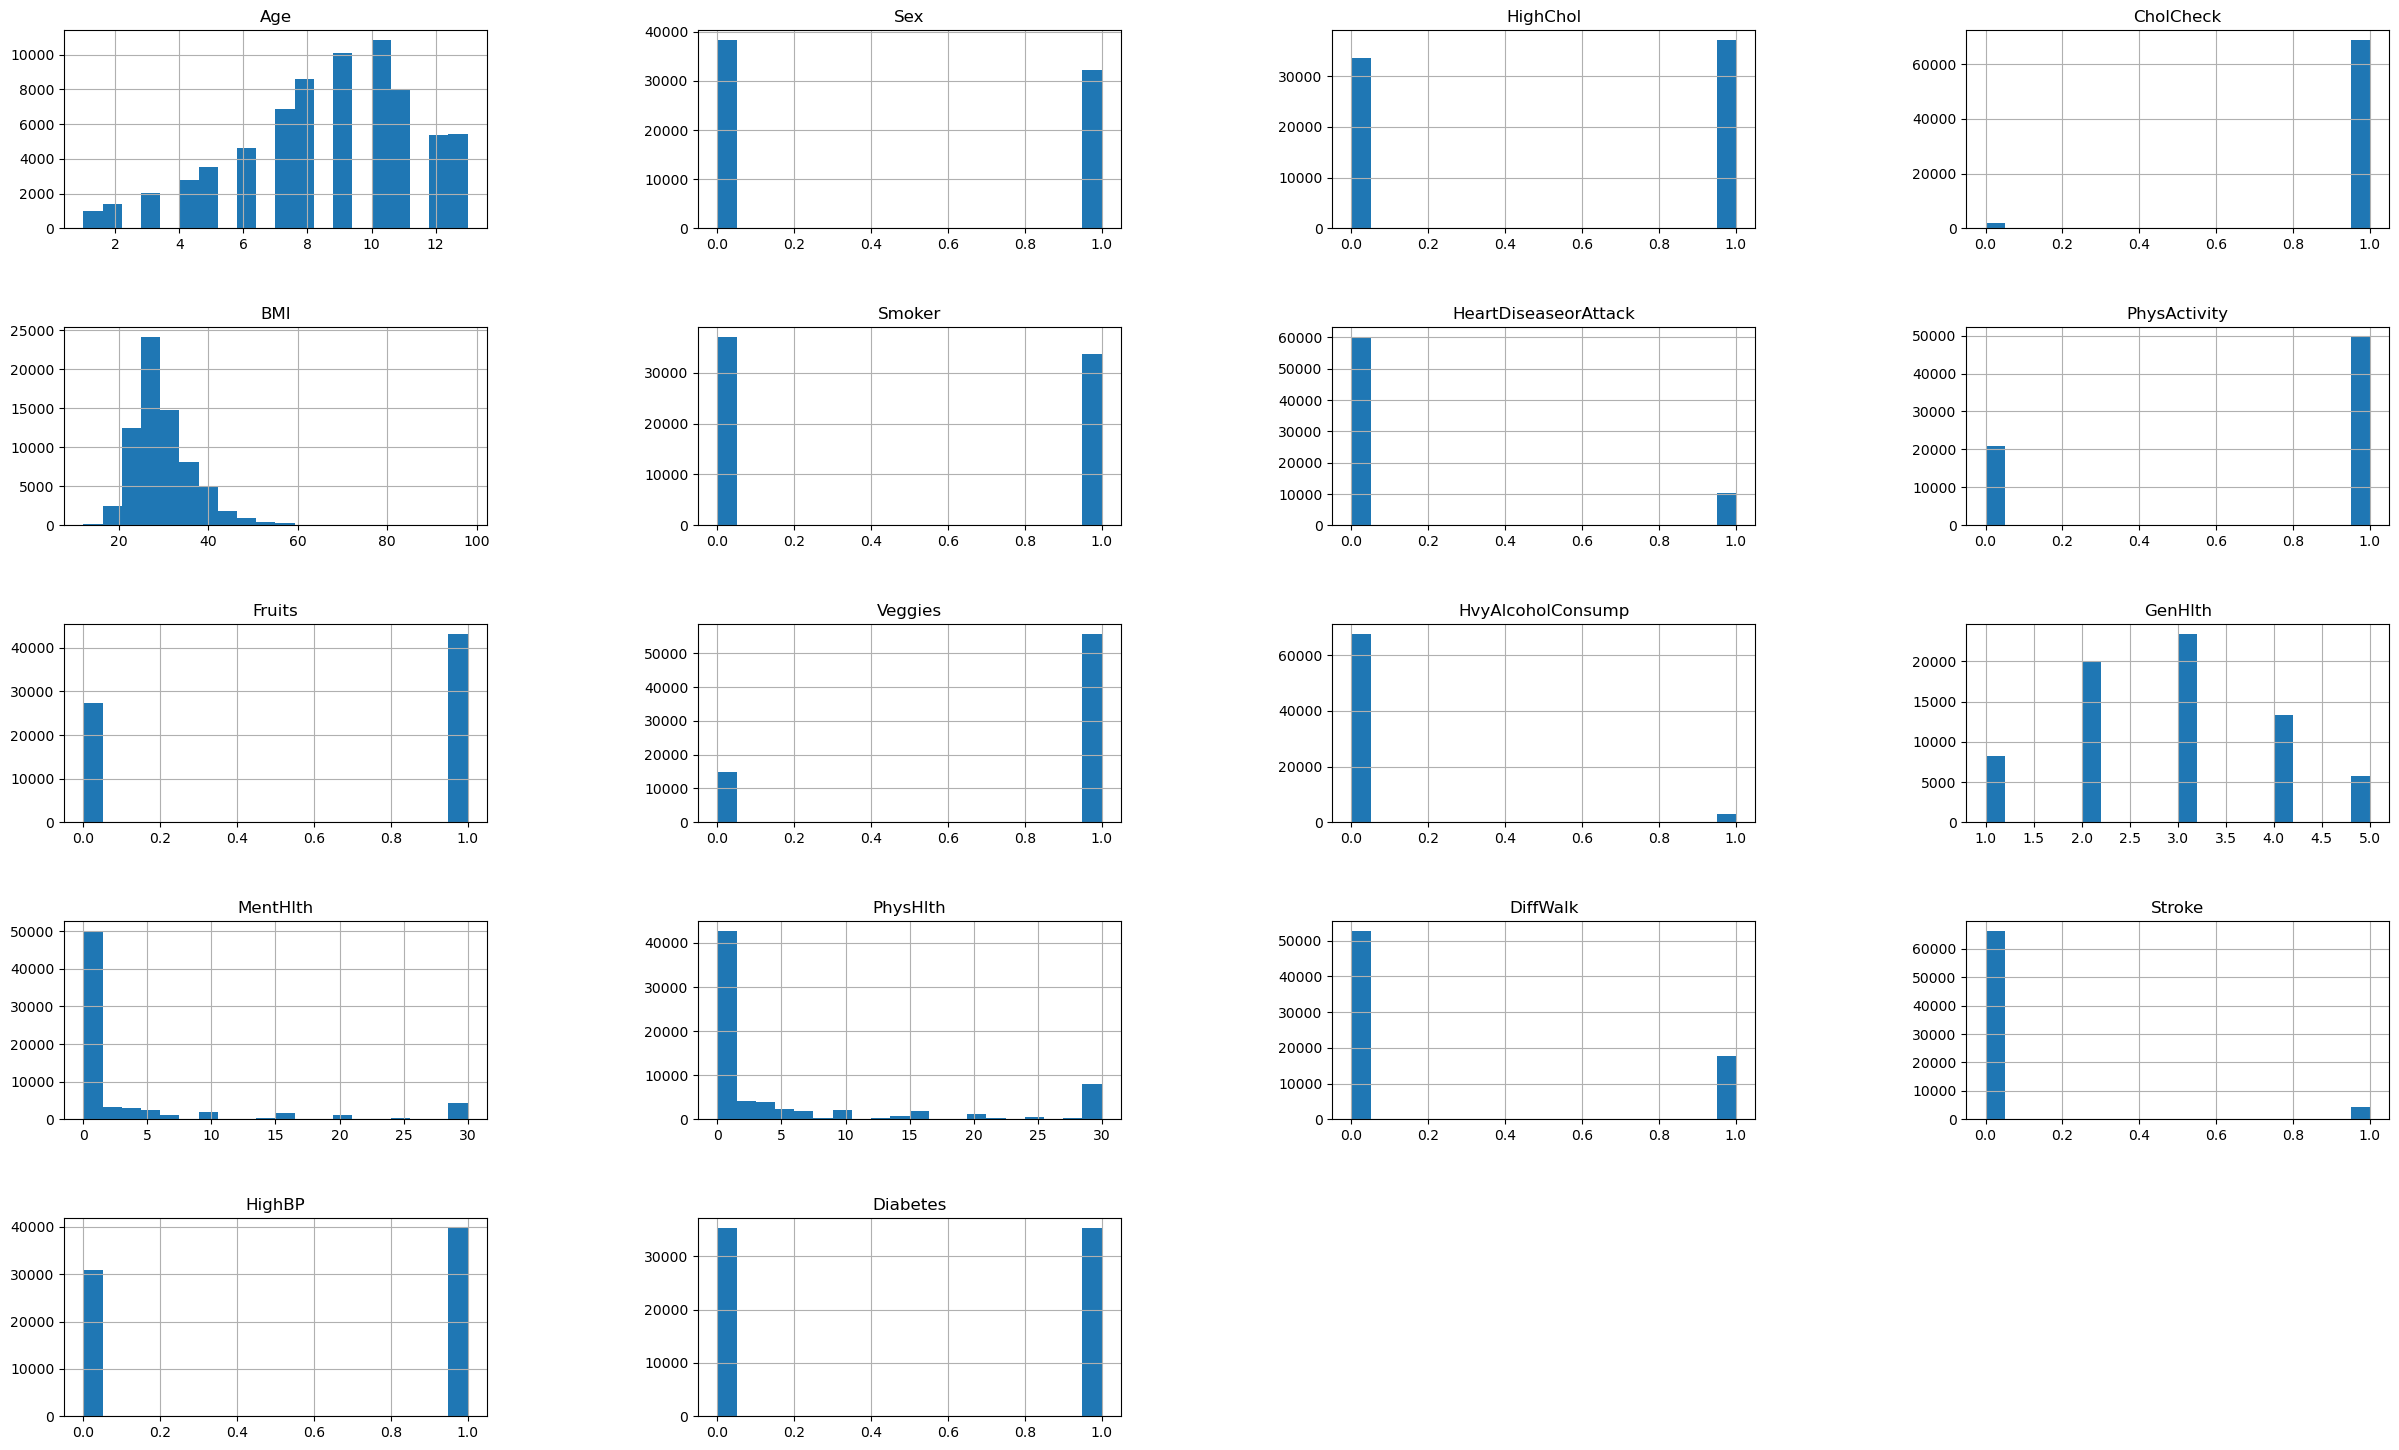

In [10]:
df.hist(bins=20, figsize=(30,18))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

### Data Split

In [11]:
train_data = df.iloc[:int(len(df)*0.7)]
val_data = df.iloc[int(len(df)*0.7):int(len(df)*0.85)]
test_data = df.iloc[int(len(df)*0.85):]

###  Data Preprocessing and separating the predictors and the lables.

In [12]:
x_train = np.array(train_data)
x_test = np.array(test_data)

y_train = np.array(train_data.pop('Diabetes'))
y_test = np.array(test_data.pop('Diabetes'))

# Data split- might change it to sklearn train_test_split

partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]
x_val = x_train[:10000]
y_val = y_train[:10000]

### Data Normalisation

In [13]:
mean = x_train.mean(axis = 0)
std = x_train.std(axis = 0)
x_train = (x_train - mean) / std
x_val = (x_val - mean) / std
x_test = (x_test - mean) / std

### Building the model

In [14]:

optimizer = RMSprop(learning_rate=0.001)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(x_train.shape[1],)))
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy']
    )

In [15]:
model.evaluate(partial_x_train, partial_y_train)

1234/1234 [==============================] - 2s 756us/step - loss: 1.9400 - accuracy: 0.3581


[1.939972162246704, 0.3580690920352936]

### Training the model

In [16]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=150, 
    batch_size=512,
    validation_data = (x_val, y_val)
    )

Epoch 1/150


78/78 [==============================] - 1s 2ms/step - loss: 0.7015 - accuracy: 0.6828 - val_loss: 0.5596 - val_accuracy: 0.9509
Epoch 2/150
78/78 [==============================] - 0s 1ms/step - loss: 0.5081 - accuracy: 0.8191 - val_loss: 0.4454 - val_accuracy: 0.9342
Epoch 3/150
78/78 [==============================] - 0s 1ms/step - loss: 0.3707 - accuracy: 0.8961 - val_loss: 0.3427 - val_accuracy: 0.9543
Epoch 4/150
78/78 [==============================] - 0s 2ms/step - loss: 0.2548 - accuracy: 0.9537 - val_loss: 0.2464 - val_accuracy: 0.9831
Epoch 5/150
78/78 [==============================] - 0s 2ms/step - loss: 0.1637 - accuracy: 0.9855 - val_loss: 0.1909 - val_accuracy: 0.9927
Epoch 6/150
78/78 [==============================] - 0s 2ms/step - loss: 0.1061 - accuracy: 0.9949 - val_loss: 0.1378 - val_accuracy: 0.9964
Epoch 7/150
78/78 [==============================] - 0s 1ms/step - loss: 0.0757 - accuracy: 0.9977 - val_loss: 0.1120 - val_accuracy: 0.9983
Epoch 8/150
78/78 [======

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Validating the model

In [18]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

132/332 [==========>...................] - ETA: 0s - loss: 0.0666 - accuracy: 0.9993

332/332 [==============================] - 0s 760us/step - loss: 0.0711 - accuracy: 0.9988
Test Accuracy: 0.9988


### Early Stopping

In [24]:
def early_stopping(history):


    # Best validation loss
    early_stopping_loss_epoch = np.argmin(history.history["val_loss"])
    print(f"Reached best validation loss {history.history['val_loss'][early_stopping_loss_epoch]} at epoch {early_stopping_loss_epoch + 1}")

    # Best validation accuracy

    global early_stopping_acc_epoch # To be used in a different cell
    early_stopping_acc_epoch = np.argmax(history.history["val_accuracy"]) + 1
    print(f"Reached best validation accuracy {history.history['val_accuracy'][early_stopping_acc_epoch]} at epoch {early_stopping_acc_epoch}")

early_stopping(history)

Reached best validation loss 0.009841354563832283 at epoch 150
Reached best validation accuracy 1.0 at epoch 12


### Loss and Accuracy Plot

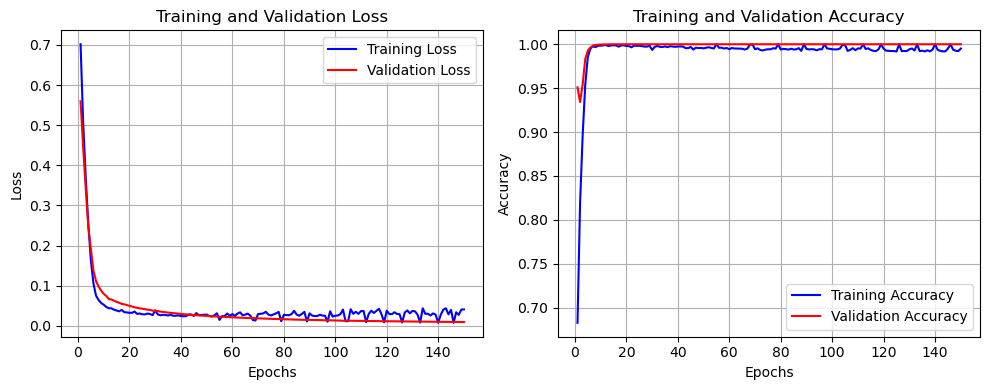

In [19]:
def plot_history(history):
    history_dict = history.history
    epochs = range(1, len(history_dict['loss']) + 1)

    # Plotting loss
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history_dict['loss'], label='Training Loss', color='blue')
    plt.plot(epochs, history_dict['val_loss'], label='Validation Loss', color='red')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()

    # Plotting accuracy
    plt.subplot(1, 2, 2) 
    plt.plot(epochs, history_dict['accuracy'], label='Training Accuracy', color='blue')
    plt.plot(epochs, history_dict['val_accuracy'], label='Validation Accuracy', color='red')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_history(history)


### Build the final model on the entire dataet

In [29]:
tf.keras.backend.clear_session() # Clearing the previous model

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(x_train.shape[1],)))
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

### Train the entire dataset

In [27]:
history = model.fit(
    x_train,
    y_train,
    epochs= early_stopping_acc_epoch, 
    batch_size=512,
    )

Epoch 1/12
97/97 [==============================] - 1s 1ms/step - loss: 0.2326 - accuracy: 0.9590
Epoch 2/12
97/97 [==============================] - 0s 1ms/step - loss: 0.0555 - accuracy: 1.0000
Epoch 3/12
97/97 [==============================] - 0s 1ms/step - loss: 0.0246 - accuracy: 1.0000
Epoch 4/12
97/97 [==============================] - 0s 1ms/step - loss: 0.0115 - accuracy: 1.0000
Epoch 5/12
97/97 [==============================] - 0s 1ms/step - loss: 0.0065 - accuracy: 1.0000
Epoch 6/12
97/97 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 7/12
97/97 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 8/12
97/97 [==============================] - 0s 1ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 9/12
97/97 [==============================] - 0s 1ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 10/12
97/97 [==============================] - 0s 1ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 11/12
97/97 [

In [28]:
model.evaluate(x_test, y_test)

332/332 [==============================] - 0s 760us/step - loss: 0.0034 - accuracy: 1.0000


[0.0033536290284246206, 1.0]

### Evaluation

### Conclusion